Importing the dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
#loading the data from csv file to a Pandas Dataframe
insurance_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Project 11 Medical Insurance Cost Prediction/insurance.csv')

In [3]:
#load the first 5 rows of the data
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [5]:
#getting some information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorial Features

- Sex
- Smoker
- Region

In [6]:
#value counts of the Age Column
insurance_data.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [7]:
#value counts of the Sex Column

insurance_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
#value counts of the Children Column

insurance_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
#value counts of the Smoker Column
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
#value counts of the Region Column
insurance_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [12]:
#statistical measures of the dataset
insurance_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<ipython-input-13-05b6a708fc54>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


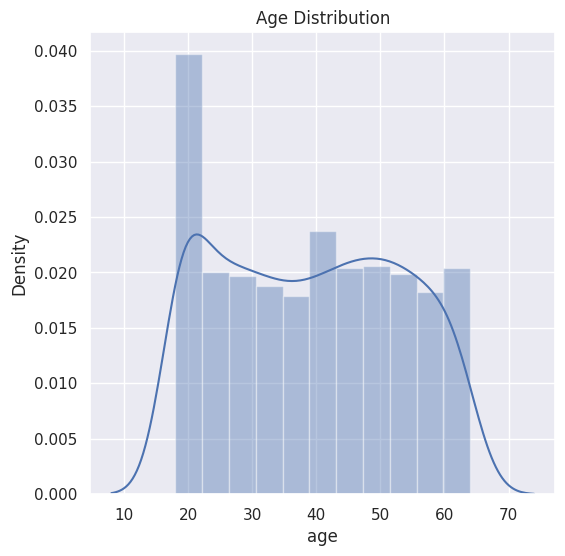

In [13]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

#more number of people are from the age group 20s

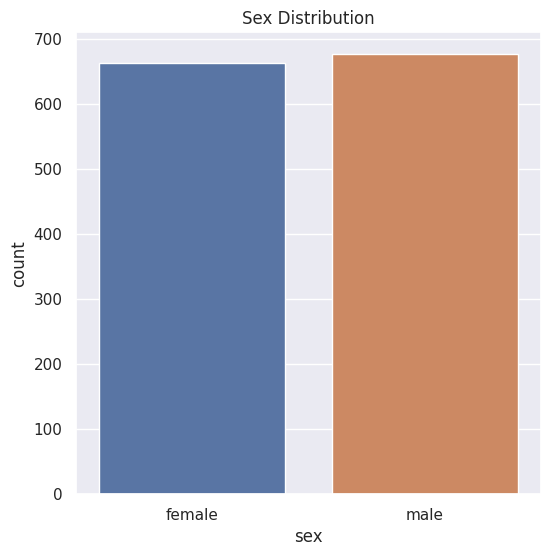

In [14]:
# Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex',data = insurance_data)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-16-a0d16c1dd0a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


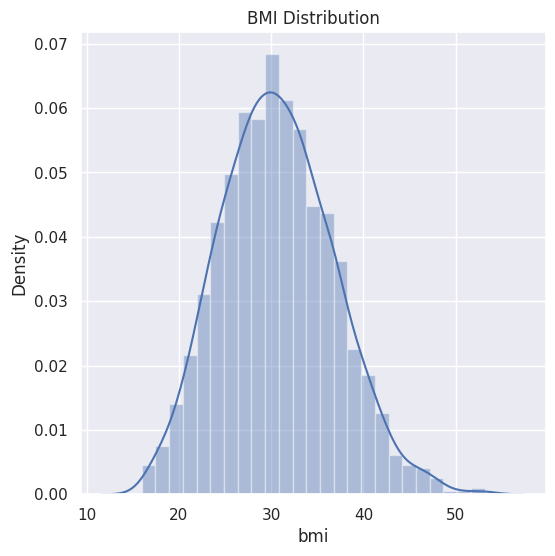

In [16]:
# distribution of bmi value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

#more number of people are from the age group 20s

Normal BMI Range --> 18.5 to 24.9



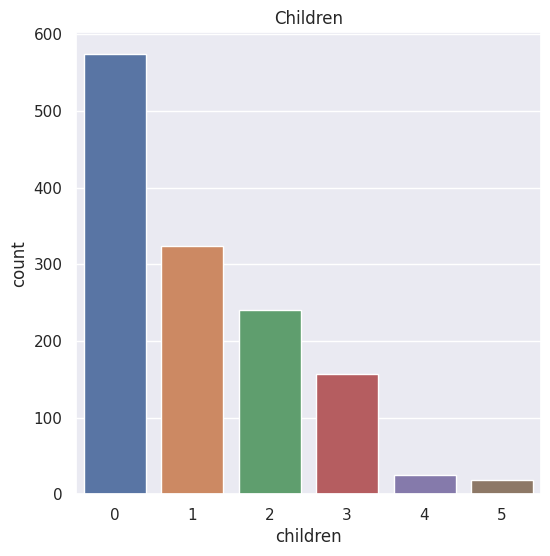

In [17]:
#children column
plt.figure(figsize = (6,6))
sns.countplot(x='children', data = insurance_data)
plt.title('Children')
plt.show()

In [18]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

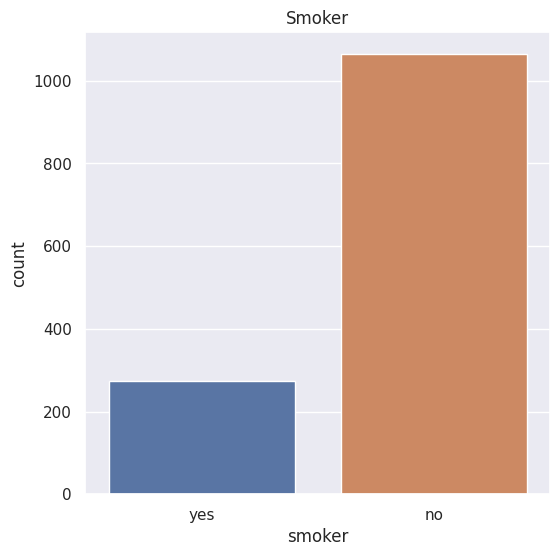

In [19]:
#Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x='smoker', data = insurance_data)
plt.title('Smoker')
plt.show()

In [20]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

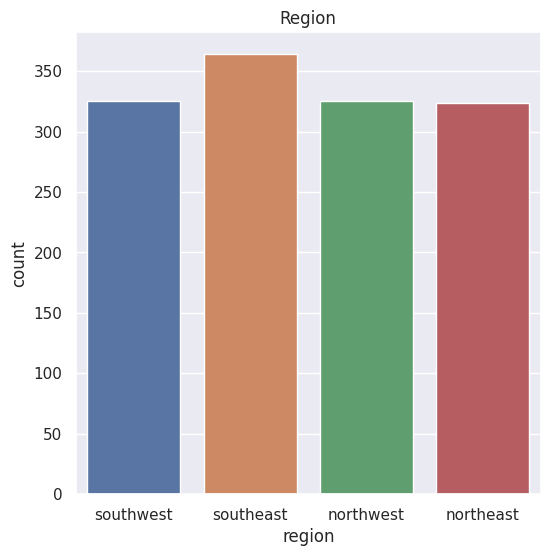

In [21]:
#region column
plt.figure(figsize = (6,6))
sns.countplot(x='region', data = insurance_data)
plt.title('Region')
plt.show()

In [22]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-23-3ff339e144f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


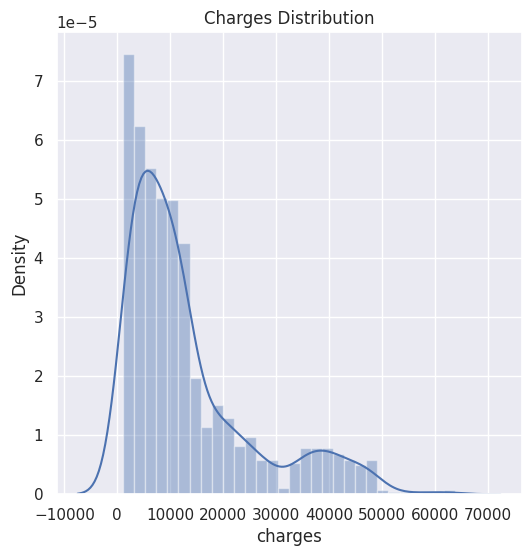

In [23]:
# distribution of charges value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()



Data Preprocessing

In [24]:
# encoding = give numerical values to the categorical features


In [25]:
# encoding the sex column
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace= True)

In [26]:
#encoding the smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace = True)

In [27]:
#encoding the region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [28]:
insurance_data

age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]

Splitting the features and target

In [29]:
X = insurance_data.drop(columns = 'charges', axis = 1)
Y = insurance_data['charges']

In [30]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Test Train Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [35]:
# loading the linear regression model
regressor = LinearRegression()

In [36]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [39]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [40]:
#R Squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.751505643411174


In [41]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [42]:
#R Squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7447273869684076


In [43]:
#overtraining ~ overfitting where model will over learn in training data.

Building a Predictive System

In [51]:
input_data = (31,1,25.74,0,1,0) #originla is 3756.62

#changing input data to a numpy array
input_data_as_numpyarray = np.asarray(input_data)

#reshape the numpyarray
input_data_reshaped = input_data_as_numpyarray.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

# very close to the model

print('The insurance cost is USD', prediction[0])
print()

[3760.0805765]
The insurance cost is USD 3760.080576496057



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
